#                                      Exploratort Data Analysis

### Step 1

## Aspiring Mind Employment Outcome 2015 (AMEO)

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  



### Step 2

In [7]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/EDAProject"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EDAProject


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats


In [8]:
df=pd.read_excel("data.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
df.shape                                ## Description of dataset

(3998, 39)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [11]:
df.describe()                              ## Statistical description of dataset

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [12]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [13]:
df.duplicated().sum()                       ### No duplicate values

0

In [14]:
#### Drop irrelevent columns:

df.drop(columns=["Unnamed: 0", "ID", "CollegeID", "CollegeCityID"], inplace=True)

In [15]:
df.shape

(3998, 35)

In [16]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [17]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

### Step-3: Univariate Analysis

#### Univariate analysis: Statistical analysis of a single (numerical)variable/Feature

In [18]:
df.describe().columns

Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Analysis of Target variable = "Salary"

In [19]:
## maximum salary

df["Salary"].max()

4000000

In [20]:
## minimum salary

df["Salary"].min()

35000

In [21]:
## median salary

df["Salary"].median()

300000.0

In [22]:
## mean salary

df["Salary"].mean()

307699.8499249625

In [23]:
df["Salary"].std()                      #### There is outlier present in the salary column

212737.49995685622

<Axes: >

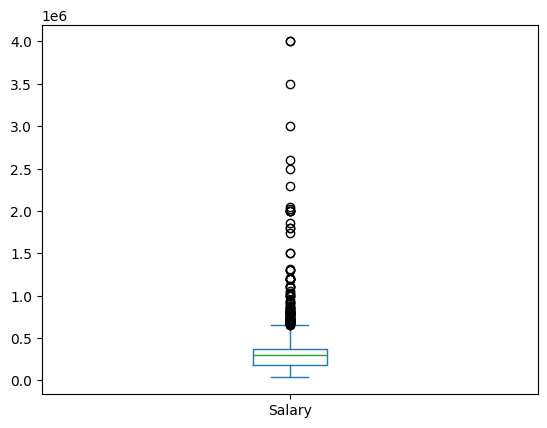

In [24]:
df["Salary"].plot(kind="box")

<Axes: title={'center': 'Salary distribution/Probability distribution plot'}, ylabel='Density'>

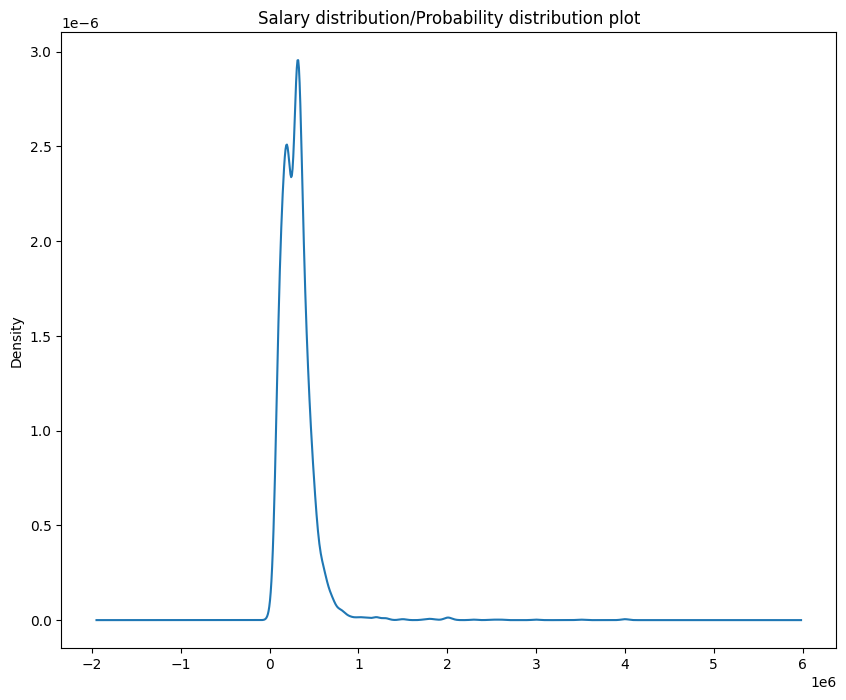

In [25]:
df["Salary"].plot(kind="kde",title="Salary distribution/Probability distribution plot", figsize=(10,8))

<Axes: title={'center': 'Salary box plot'}>

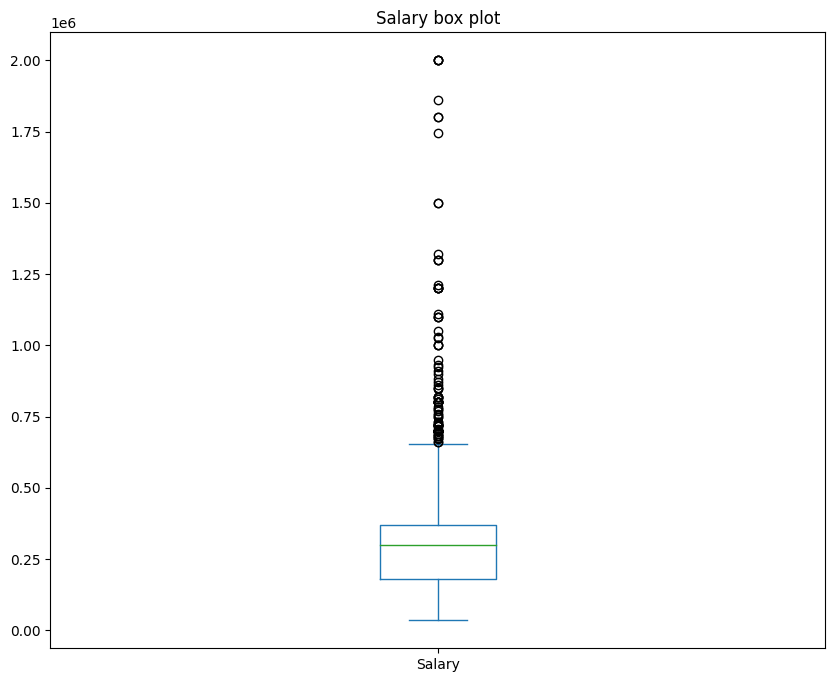

In [26]:
### Outlier treatment
clean_df=df[df["Salary"] <= 2000000]
clean_df["Salary"].plot(kind="box",title="Salary box plot",figsize=(10,8))

<Axes: >

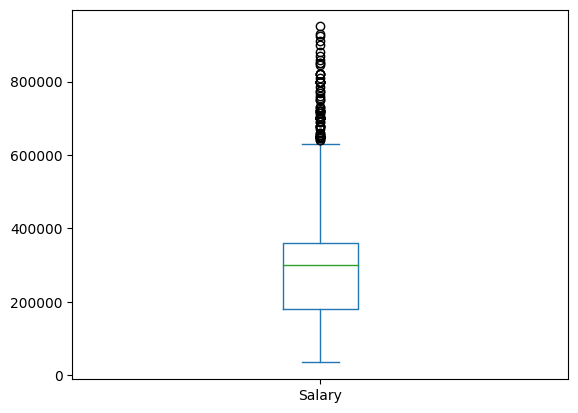

In [27]:
## Outlier detection

clean_df.loc[clean_df["Salary"] >= 1000000, "Salary"] = clean_df["Salary"].median()
clean_df["Salary"].plot(kind="box")

In [28]:
clean_df["Salary"].median()

300000.0

In [29]:
clean_df["Salary"].mean()

293824.01604412135

In [30]:
clean_df["Salary"].max()

950000

In [31]:
q1_S=clean_df["Salary"].quantile(0.25)
print(q1_S)

180000.0


In [32]:
q3_S=clean_df["Salary"].quantile(0.75)
print(q3_S)

360000.0


In [33]:
IQR_S=(q3_S - q1_S)
IQR_S

180000.0

In [34]:
salary_upper_bound=q3_S+1.5*IQR_S
print(salary_upper_bound)

630000.0


In [35]:
salary_lower_bound=q1_S-1.5*IQR_S
print(salary_lower_bound)

-90000.0


In [36]:
clean_df_1=clean_df[(clean_df["Salary"]>=salary_lower_bound)&(clean_df["Salary"]<=salary_upper_bound)]
clean_df_1.shape

(3899, 35)

<Axes: >

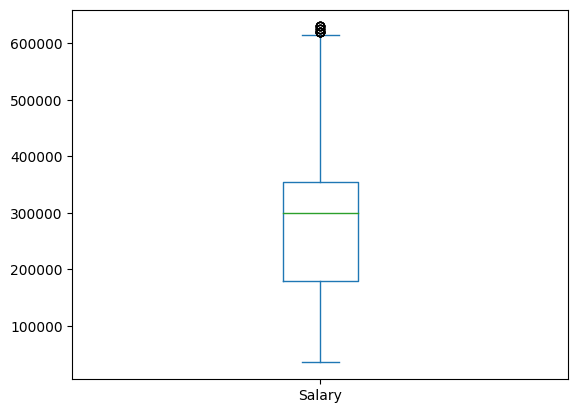

In [37]:
clean_df_1["Salary"].plot(kind="box")

<Axes: title={'center': 'Salary distribution of cleaned data'}, ylabel='Density'>

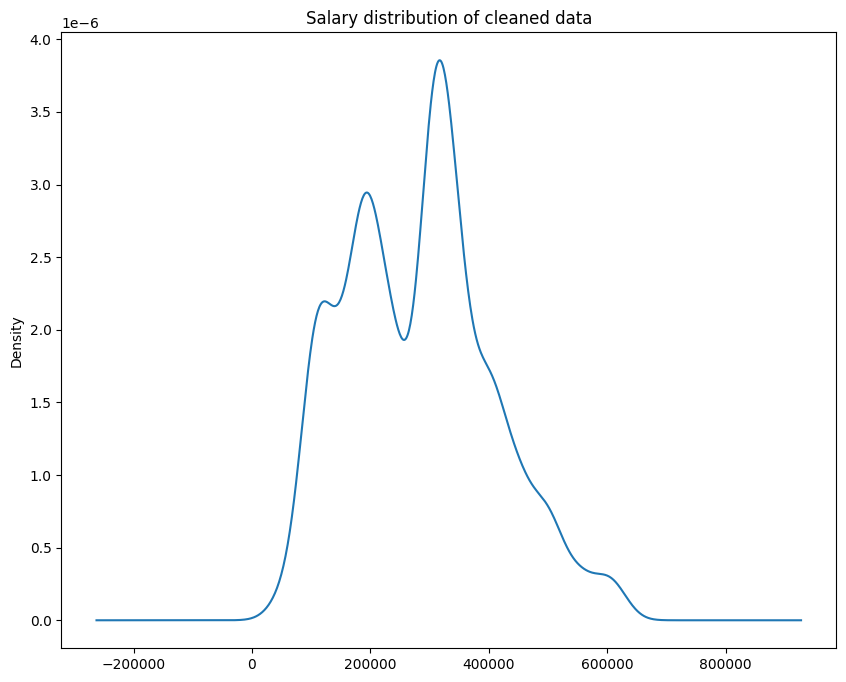

In [38]:
clean_df_1["Salary"].plot(kind="kde",title="Salary distribution of cleaned data",figsize=(10,8))

In [39]:
clean_df_1["Salary"].max()

630000

In [40]:
clean_df_1["Salary"].min()

35000

### Analysis of other numerical columns

In [41]:
df.corr()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Salary,1.000000,0.177373,-0.161383,0.170254,-0.179332,0.130103,0.015384,-0.010053,0.178219,0.179275,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.177373,1.000000,0.269957,0.643378,-0.126042,0.312538,0.116707,-0.013799,0.350780,0.316014,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,-0.161383,0.269957,1.000000,0.259166,0.027691,0.086001,-0.003016,0.014457,0.147925,0.105887,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.170254,0.643378,0.259166,1.000000,-0.100771,0.346137,0.130462,-0.012933,0.212888,0.243571,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeTier,-0.179332,-0.126042,0.027691,-0.100771,1.000000,-0.086781,-0.101494,-0.005557,-0.183843,-0.182811,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.130103,0.312538,0.086001,0.346137,-0.086781,1.000000,0.017471,0.008706,0.106478,0.196610,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityTier,0.015384,0.116707,-0.003016,0.130462,-0.101494,0.017471,1.000000,0.008152,0.050462,0.020353,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790
GraduationYear,-0.010053,-0.013799,0.014457,-0.012933,-0.005557,0.008706,0.008152,1.000000,-0.024089,-0.024018,...,0.024089,-0.066844,0.008525,0.004226,0.001696,-0.013235,-0.002877,0.008397,-0.000417,0.016855
English,0.178219,0.350780,0.147925,0.212888,-0.183843,0.106478,0.050462,-0.024089,1.000000,0.444357,...,0.059500,-0.002477,0.032438,-0.005822,-0.007724,0.034943,0.194990,0.018755,-0.155528,0.067979
Logical,0.179275,0.316014,0.105887,0.243571,-0.182811,0.196610,0.020353,-0.024018,0.444357,1.000000,...,0.044481,-0.009861,0.012003,-0.012947,-0.011286,0.025876,0.167207,-0.006949,-0.178781,0.048420


Salary                      Axes(0.125,0.747241;0.110714x0.132759)
10percentage             Axes(0.257857,0.747241;0.110714x0.132759)
12graduation             Axes(0.390714,0.747241;0.110714x0.132759)
12percentage             Axes(0.523571,0.747241;0.110714x0.132759)
CollegeTier              Axes(0.656429,0.747241;0.110714x0.132759)
collegeGPA               Axes(0.789286,0.747241;0.110714x0.132759)
CollegeCityTier             Axes(0.125,0.587931;0.110714x0.132759)
GraduationYear           Axes(0.257857,0.587931;0.110714x0.132759)
English                  Axes(0.390714,0.587931;0.110714x0.132759)
Logical                  Axes(0.523571,0.587931;0.110714x0.132759)
Quant                    Axes(0.656429,0.587931;0.110714x0.132759)
Domain                   Axes(0.789286,0.587931;0.110714x0.132759)
ComputerProgramming         Axes(0.125,0.428621;0.110714x0.132759)
ElectronicsAndSemicon    Axes(0.257857,0.428621;0.110714x0.132759)
ComputerScience          Axes(0.390714,0.428621;0.110714x0.132

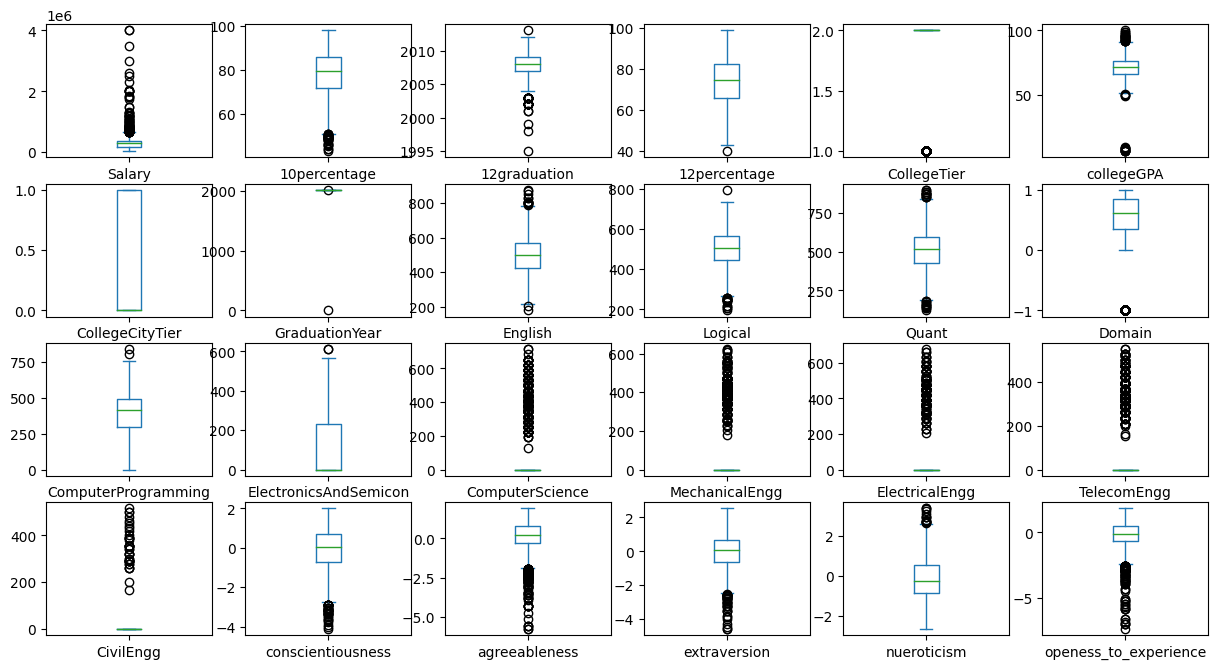

In [42]:
df.plot(kind='box', subplots=True, layout=(5, 6), figsize=(15,10))


In [ ]:
#### Analysis of "10percentage" column

In [43]:
df["10percentage"].mean()

77.9254427213607

In [44]:
df["10percentage"].max()

97.76

In [45]:
df["10percentage"].min()

43.0

In [46]:
df["10percentage"].median()


79.15

<Axes: >

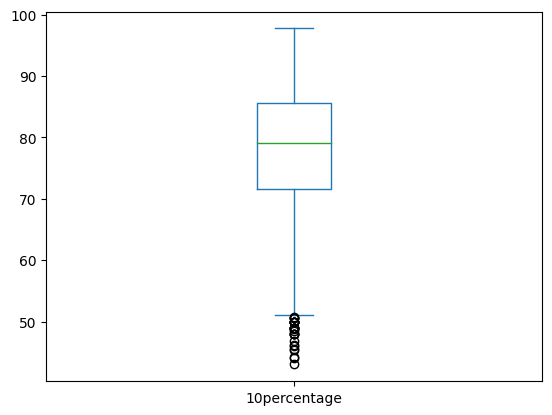

In [47]:
    ### Outlier detection
df["10percentage"].plot(kind="box")

In [48]:
df.loc[df["10percentage"] < 50, "10percentage"] = df["10percentage"].mean()

(3998, 35)

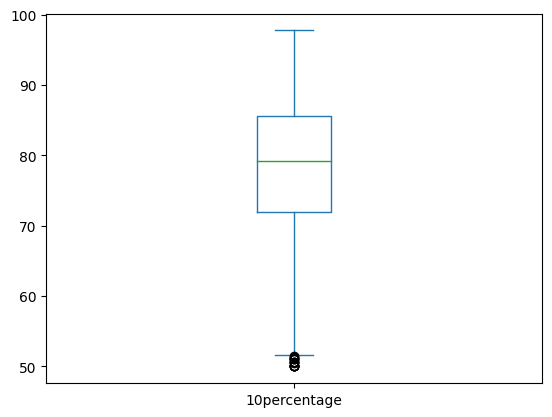

In [49]:
df["10percentage"].plot(kind="box")
df.shape

In [50]:
df["10percentage"].mean()

78.07881412066715

In [51]:
df["10percentage"].median()

79.15

In [52]:
q1=df["10percentage"].quantile(0.25)
q1

72.0

In [53]:
q3=df["10percentage"].quantile(0.75)
q3

85.67

In [54]:
iqr= q3-q1
iqr

13.670000000000002

In [55]:
_10per_lower_bound=q1-iqr*1.5
print(_10per_lower_bound)

51.495


In [56]:
_10per_upper_bound = q3+iqr*1.5
print(_10per_upper_bound)

106.17500000000001


In [57]:
df_10per=df[(df["10percentage"]>=_10per_lower_bound) & (df["10percentage"]<=_10per_upper_bound)]
df_10per.shape

(3982, 35)

<Axes: >

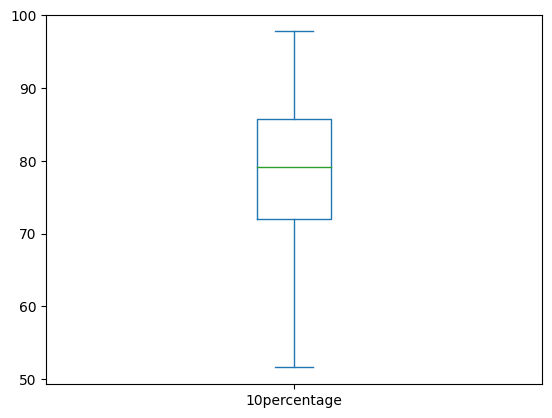

In [58]:
df_10per["10percentage"].plot(kind="box")

In [59]:
df_10per["10percentage"].median()

79.2

In [60]:
df_10per["10percentage"].mean()

78.18929152547142

<Axes: ylabel='Density'>

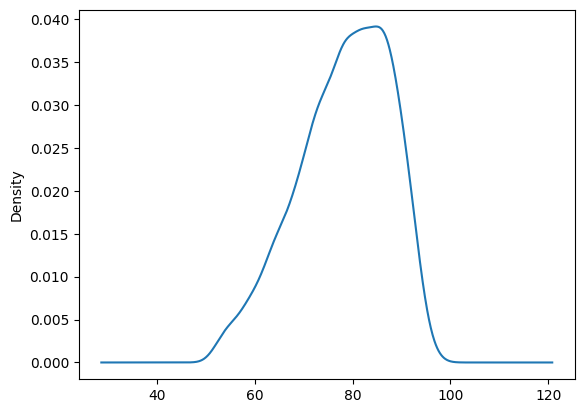

In [61]:
df_10per["10percentage"].plot(kind="kde")

<Axes: ylabel='Density'>

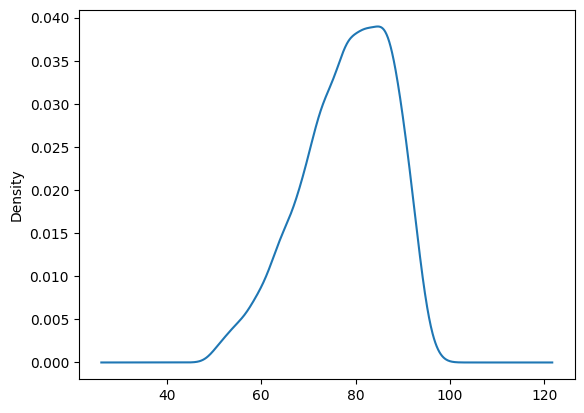

In [62]:
df["10percentage"].plot(kind="kde")

In [ ]:
### Analysis of "12percentage" Feature

In [63]:
df["12percentage"].max()

98.7

In [64]:
df["12percentage"].min()

40.0

In [65]:
df["12percentage"].mean()

74.46636568284141

In [66]:
df["12percentage"].median()                             #### median value is 74.4

74.4

In [67]:
df["12percentage"].std()

10.999933102957721

<Axes: >

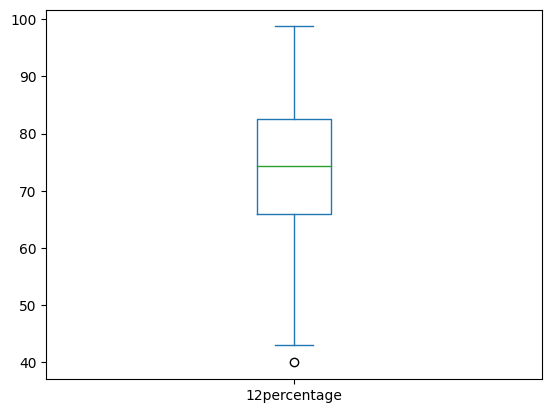

In [68]:
df["12percentage"].plot(kind="box")

<Axes: >

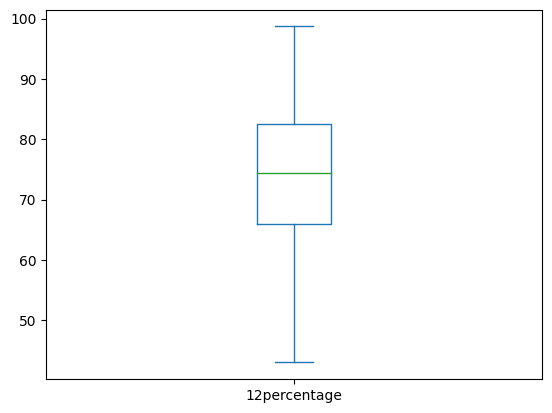

In [69]:
df_12per=df[df["12percentage"]>40]
df_12per["12percentage"].plot(kind="box")

<Axes: ylabel='Density'>

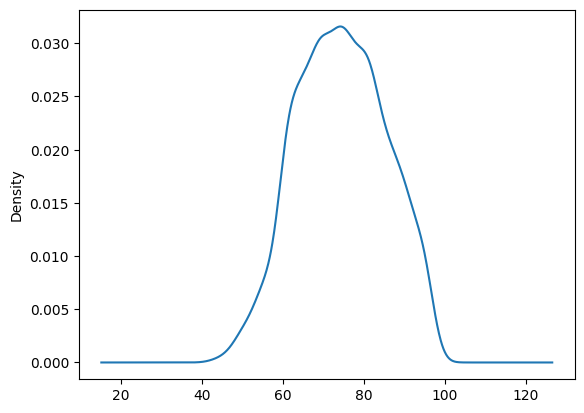

In [70]:
df_12per["12percentage"].plot(kind="kde")                          #### Distribution plot

In [71]:
df_12per["12percentage"].max()

98.7

In [72]:
df_12per["12percentage"].min()

43.0

In [73]:
df_12per["12percentage"].median()                                           ### Average 12th percentage=74.4%

74.4

In [ ]:
df_12per["12percentage"].mean()

74.47498874155603

In [ ]:
### Analysis of "collegeGPA" Feature

In [74]:
df["collegeGPA"].max()

99.93

In [75]:
df["collegeGPA"].min()

6.45

In [76]:
df["collegeGPA"].median()

71.72

In [77]:
df["collegeGPA"].mean()

71.48617058529265

<Axes: >

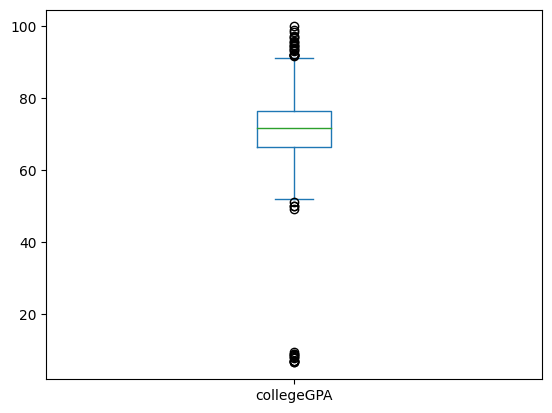

In [78]:
df["collegeGPA"].plot(kind="box")

In [79]:
df_collgpa=df[df["collegeGPA"]>=55]
df_collgpa.shape

(3957, 35)

<Axes: >

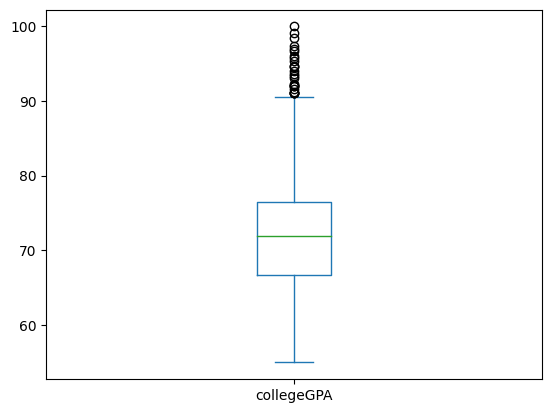

In [80]:
df_collgpa["collegeGPA"].plot(kind="box")

In [81]:
df_collgpa.loc[df_collgpa["collegeGPA"]>=90,"collegeGPA"] = df_collgpa["collegeGPA"].median()


<Axes: >

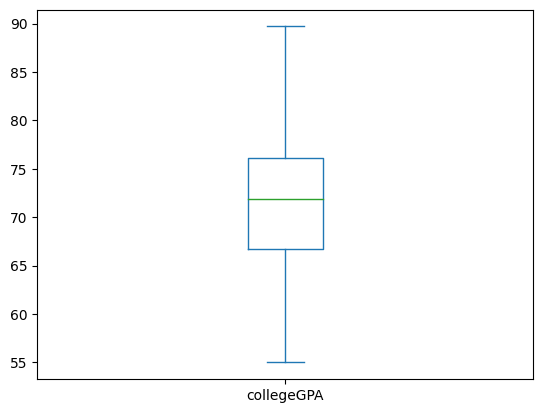

In [82]:
df_collgpa["collegeGPA"].plot(kind="box")

In [83]:
df_collgpa["collegeGPA"].median()

71.9

In [84]:
df_collgpa["collegeGPA"].mean()

71.59037149355572

In [ ]:
    ##### Distribution plot

<Axes: ylabel='Frequency'>

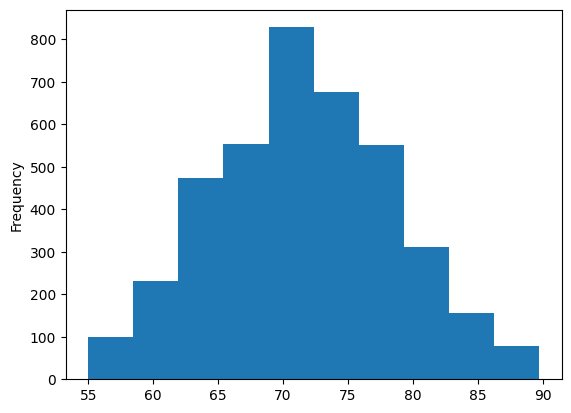

In [85]:
df_collgpa["collegeGPA"].plot(kind="hist")

<Axes: ylabel='Density'>

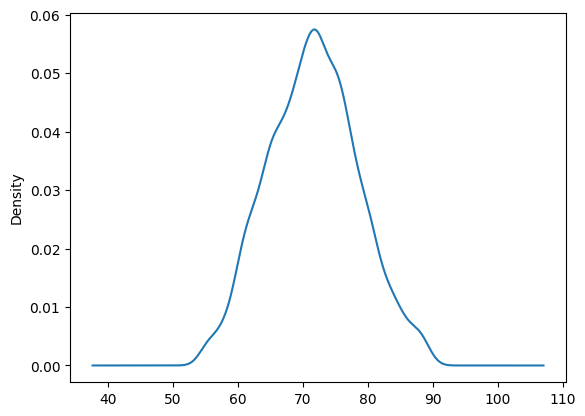

In [86]:
df_collgpa["collegeGPA"].plot(kind="kde")

In [ ]:
##### Analysis of "English" Feature

In [87]:
df["English"].max()

875

In [88]:
df["English"].min()

180

In [89]:
df["English"].median()

500.0

In [90]:
df["English"].mean()

501.64907453726863

<Axes: >

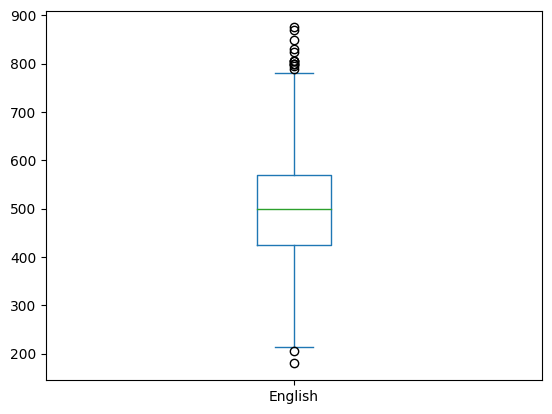

In [91]:
df["English"].plot(kind="box")

<Axes: ylabel='Density'>

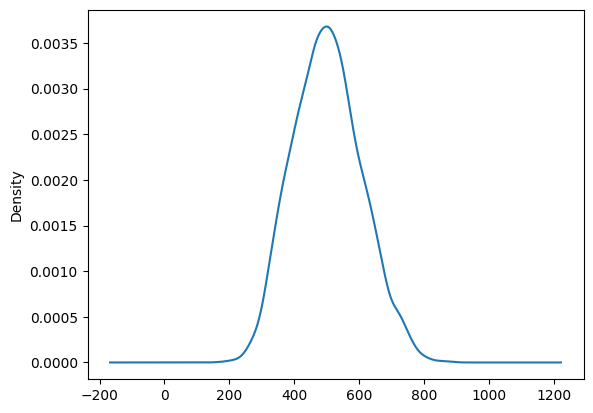

In [92]:
df["English"].plot(kind="kde")                      ### Distribution plot

In [ ]:
## Analysis of "Logical" feature

In [93]:
df["Logical"].max()

795

In [94]:
df["Logical"].min()

195

In [95]:
df["Logical"].median()

505.0

In [96]:
df["Logical"].mean()

501.59879939969983

<Axes: >

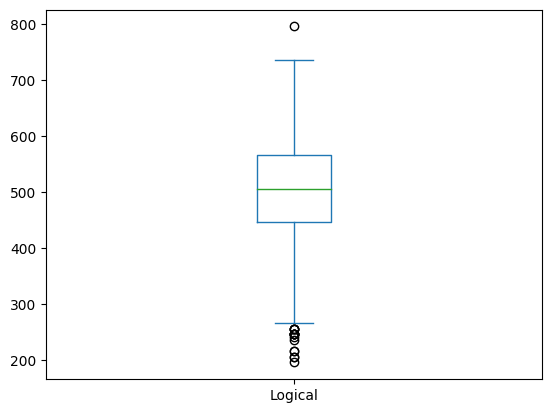

In [97]:
df["Logical"].plot(kind="box")

<Axes: >

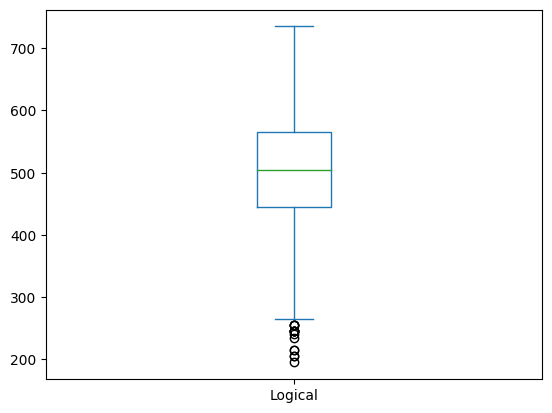

In [98]:
df_L=df[df["Logical"]<=750]
df_L["Logical"].plot(kind="box")

In [99]:
q1_L=df_L["Logical"].quantile(0.25)
q1_L

445.0

In [100]:
q3_L=df_L["Logical"].quantile(0.75)
q3_L

565.0

In [101]:
iqr_L=q3_L-q1_L
iqr_L

120.0

In [102]:
logical_lower_bound=q1_L-1.5*iqr_L
print(logical_lower_bound)

265.0


In [103]:
logical_upper_bound=q3_L+1.5*iqr_L
print(logical_upper_bound)

745.0


<Axes: >

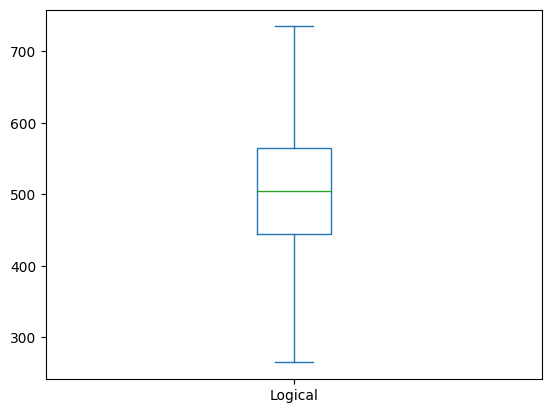

In [104]:
clean_df=df_L[(df_L["Logical"]>=logical_lower_bound)&(df_L["Logical"]<logical_upper_bound)]
clean_df["Logical"].plot(kind="box")

In [105]:
clean_df["Logical"].median()

505.0

In [106]:
clean_df["Logical"].mean()

502.6625628140703

<Axes: ylabel='Density'>

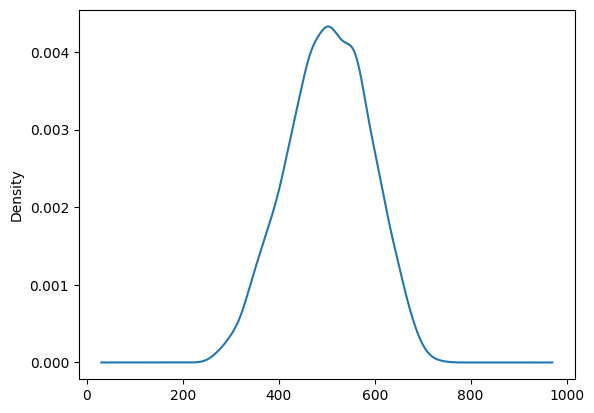

In [107]:
clean_df["Logical"].plot(kind="kde")                              #####  Distribution plot

In [ ]:
### Analysis of "Quant" fetaure

In [108]:
df["Quant"].max()

900

In [109]:
df["Quant"].min()

120

In [110]:
df["Quant"].median()

515.0

In [111]:
df["Quant"].mean()

513.3781890945472

In [112]:
df["Quant"].std()

122.30233211125677

<Axes: >

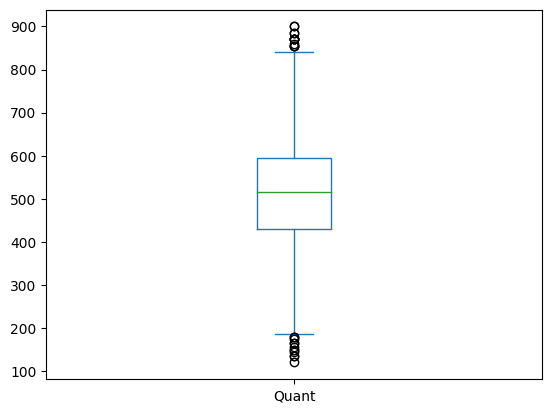

In [113]:
df["Quant"].plot(kind="box")

In [114]:
q1_Q=df["Quant"].quantile(0.25)
q1_Q

430.0

In [115]:
q3_Q=df["Quant"].quantile(0.75)
q3_Q

595.0

In [116]:
iqr_Q=q3_Q-q1_Q
iqr_Q

165.0

In [117]:
quant_lower_bound=q1_Q-1.5*iqr_Q
print(quant_lower_bound)

182.5


In [118]:
quant_upper_bound=q1_Q+1.5*iqr_Q
print(quant_upper_bound)

677.5


<Axes: >

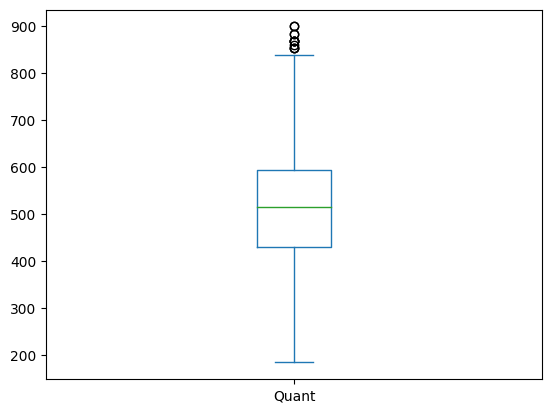

In [119]:
df_Q=df[(df["Quant"]>=quant_lower_bound) & ((df["Quant"]>=quant_lower_bound))]
df_Q["Quant"].plot(kind="box")

In [120]:
df_Q.loc[df_Q['Quant']>800,"Quant"]=df_Q["Quant"].median()


In [121]:
df_Q['Quant'].mean()

511.3687907676869

In [122]:
df_Q['Quant'].median()

515.0

In [123]:
df_Q['Quant'].max()

800

In [124]:
df_Q['Quant'].min()

185

<Axes: ylabel='Density'>

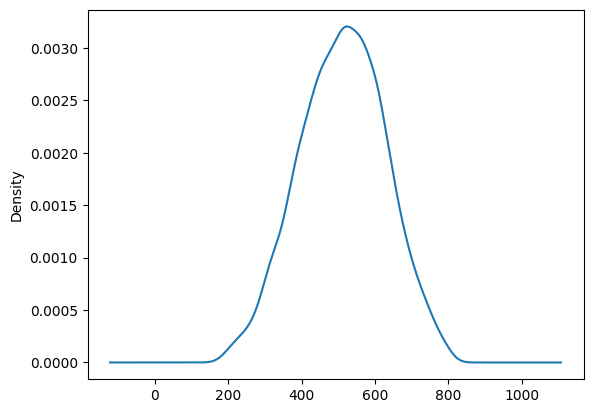

In [125]:
df_Q["Quant"].plot(kind="kde")

In [ ]:
### date of joining "GraduationYear"column

In [126]:
df["GraduationYear"].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

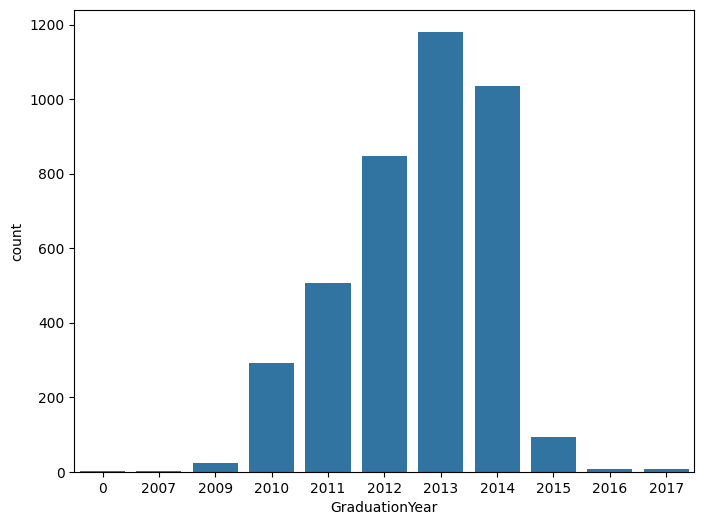

In [127]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["GraduationYear"])

plt.show()

In [ ]:
### Date of "ComputerProgramming" column

In [128]:
df["ComputerProgramming"].value_counts()

-1      868
 445    151
 435    144
 475    139
 465    134
       ... 
 214      1
 494      1
 840      1
 394      1
 554      1
Name: ComputerProgramming, Length: 79, dtype: int64

In [129]:
df["ComputerProgramming"].max()

840

In [130]:
df["ComputerProgramming"].min()

-1

In [131]:
df["ComputerProgramming"].median()

415.0

In [132]:
df["ComputerProgramming"].mean()             ### There is outlier present in the dataset

353.10280140070034

<Axes: >

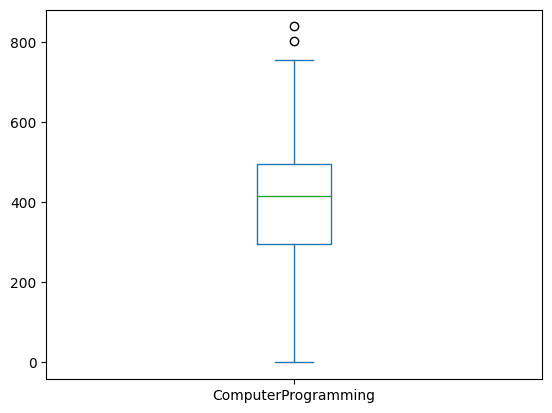

In [133]:
df["ComputerProgramming"].plot(kind="box")

<Axes: ylabel='Density'>

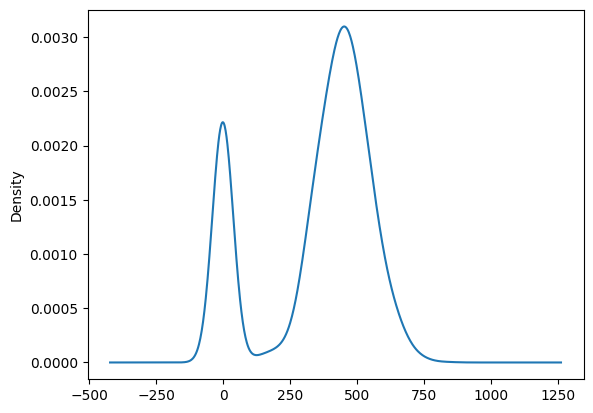

In [134]:
df["ComputerProgramming"].plot(kind="kde")

In [ ]:
#### Analysis of "ComputerScience" feature

In [135]:
df["ComputerScience"].unique

<bound method Series.unique of 0        -1
1        -1
2        -1
3        -1
4        -1
       ... 
3993     -1
3994     -1
3995     -1
3996    438
3997     -1
Name: ComputerScience, Length: 3998, dtype: int64>

In [136]:
df["ComputerScience"].max()

715

In [137]:
df["ComputerScience"].min()

-1

In [138]:
df["ComputerScience"].median()

-1.0

In [139]:
df["ComputerScience"].mean()

90.7423711855928

<Axes: >

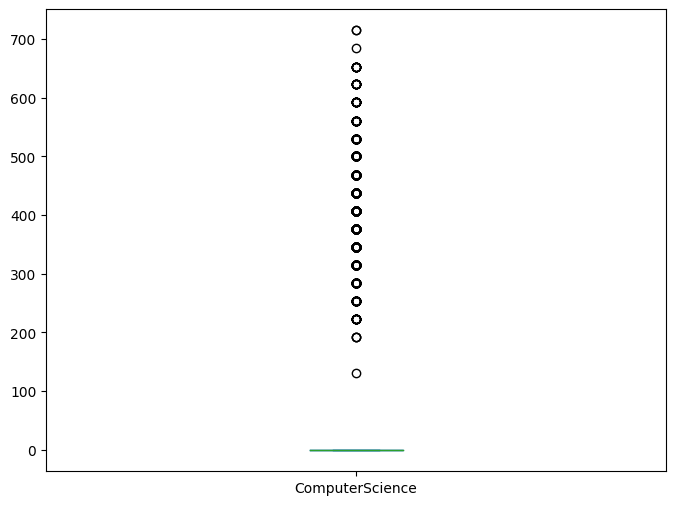

In [140]:
df["ComputerScience"].plot(kind="box", figsize=(8,6))

<Axes: ylabel='Density'>

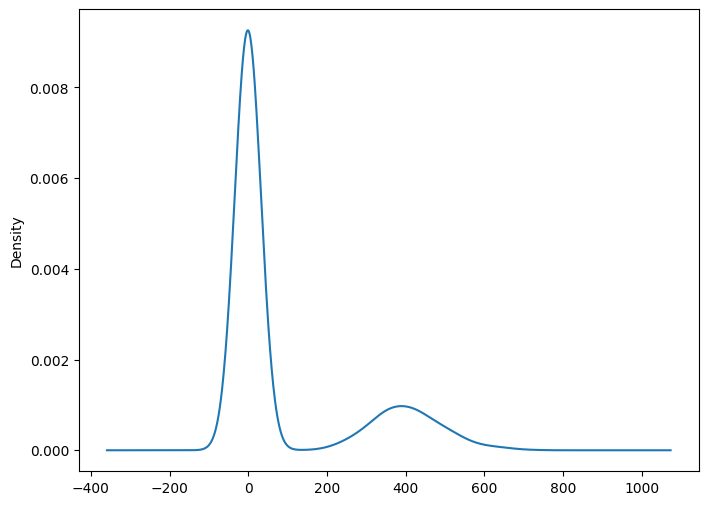

In [141]:
### Distribution plot
df["ComputerScience"].plot(kind="kde", figsize=(8,6))

In [ ]:
#### Analysis of "DOJ" column

In [142]:
df.DOJ.value_counts()

2014-07-01    199
2014-06-01    180
2014-08-01    178
2014-09-01    142
2014-01-01    142
             ... 
2015-11-01      1
2009-11-01      1
2004-08-01      1
2009-09-01      1
2007-02-01      1
Name: DOJ, Length: 81, dtype: int64

In [143]:
YOJ=df.DOJ.dt.year
YOJ.value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: DOJ, dtype: int64

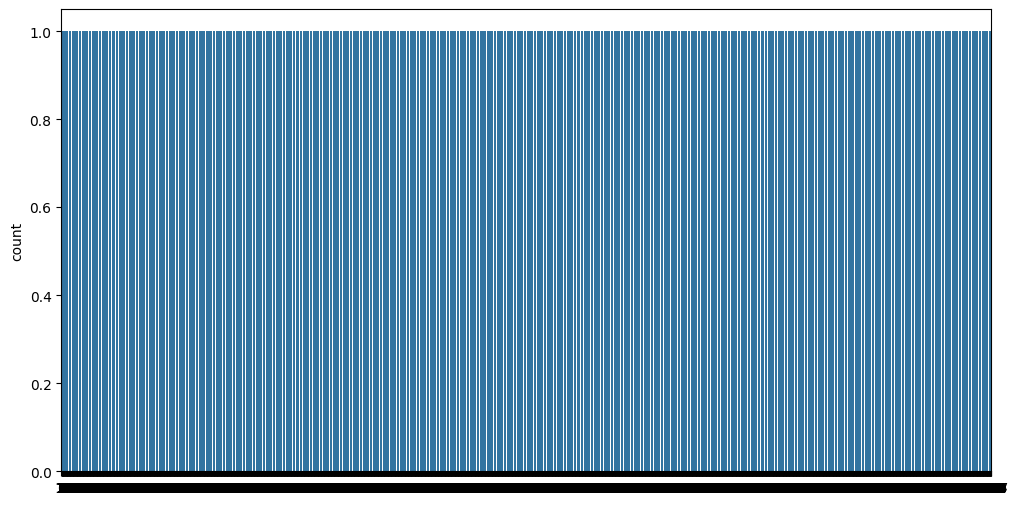

In [144]:
plt.figure(figsize=(12,6))
sns.countplot(YOJ)
plt.show()

In [145]:
MOJ=df.DOJ.dt.month_name()
MOJ.value_counts()

July         488
August       451
June         390
January      372
September    358
October      332
March        303
February     297
December     290
November     273
April        238
May          206
Name: DOJ, dtype: int64

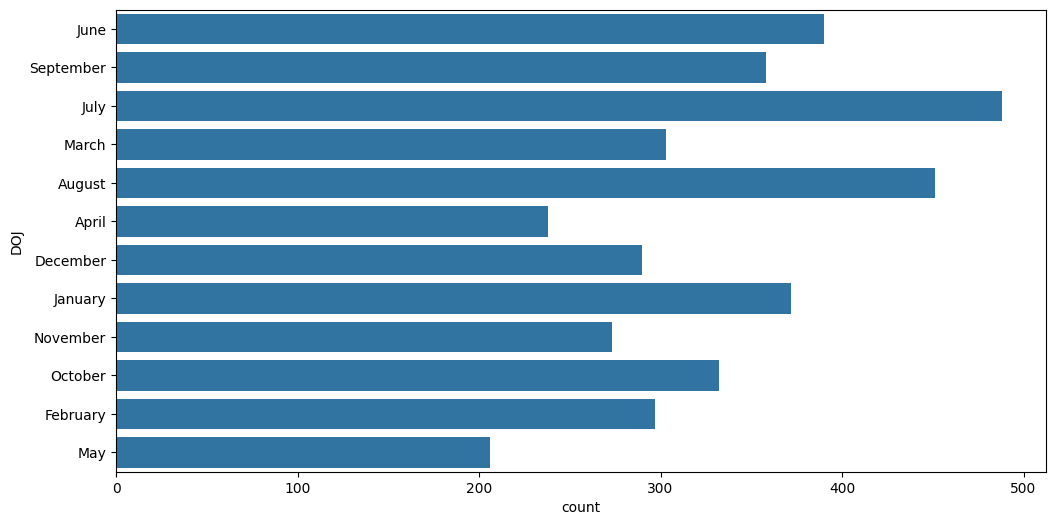

In [146]:
plt.figure(figsize=(12,6))
sns.countplot(MOJ)
plt.show()

In [ ]:
#### Removing unnecessary columns

In [147]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [148]:
new_df=df.drop(columns=['10percentage','10board','12graduation','12percentage','12board','CollegeCityTier',
                 'English','Logical','Quant','Domain','ComputerProgramming', 'DOJ','DOL','DOB',
                 'ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg',
                 'TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion',
                 'nueroticism','openess_to_experience'])
new_df.head()


,Salary,Designation,JobCity,Gender,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear
0,420000,senior quality engineer,Bangalore,f,2,B.Tech/B.E.,computer engineering,78.00,Andhra Pradesh,2011
1,500000,assistant manager,Indore,m,2,B.Tech/B.E.,electronics and communication engineering,70.06,Madhya Pradesh,2012
2,325000,systems engineer,Chennai,f,2,B.Tech/B.E.,information technology,70.00,Uttar Pradesh,2014
3,1100000,senior software engineer,Gurgaon,m,1,B.Tech/B.E.,computer engineering,74.64,Delhi,2011
4,200000,get,Manesar,m,2,B.Tech/B.E.,electronics and communication engineering,73.90,Uttar Pradesh,2012


In [149]:
new_df.shape

(3998, 10)

## Step 4: Bivariate Analysis

Bivariate analysis is a statistical analysis technique that involves analyzing two variables simultaneously to determine the relationship between them

#### Salary  Vs. CollegeTier

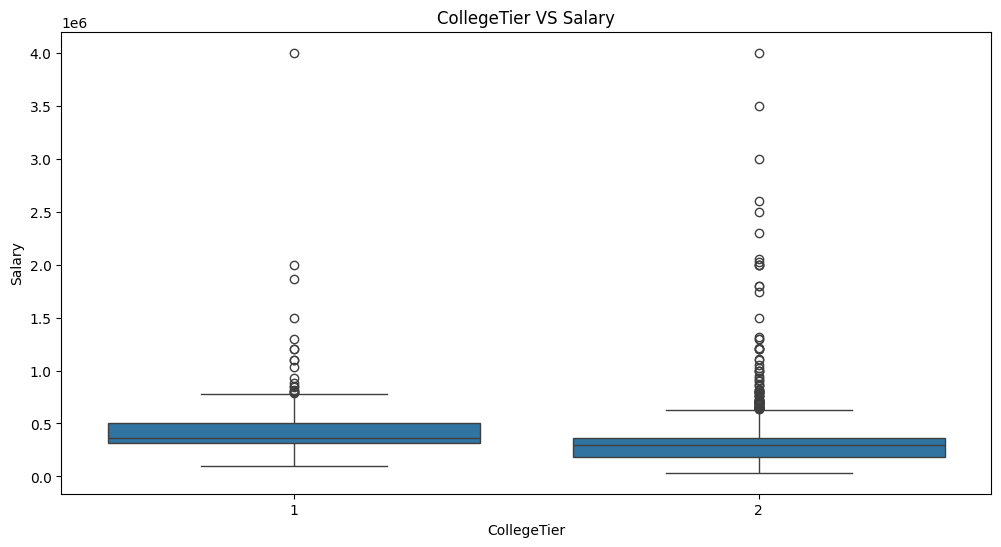

In [150]:
plt.figure(figsize=(12,6))
sns.boxplot(y="Salary", x="CollegeTier", data=new_df)
plt.title("CollegeTier VS Salary")
plt.show()

Tier 1 college staudents hve been placed with higher average value

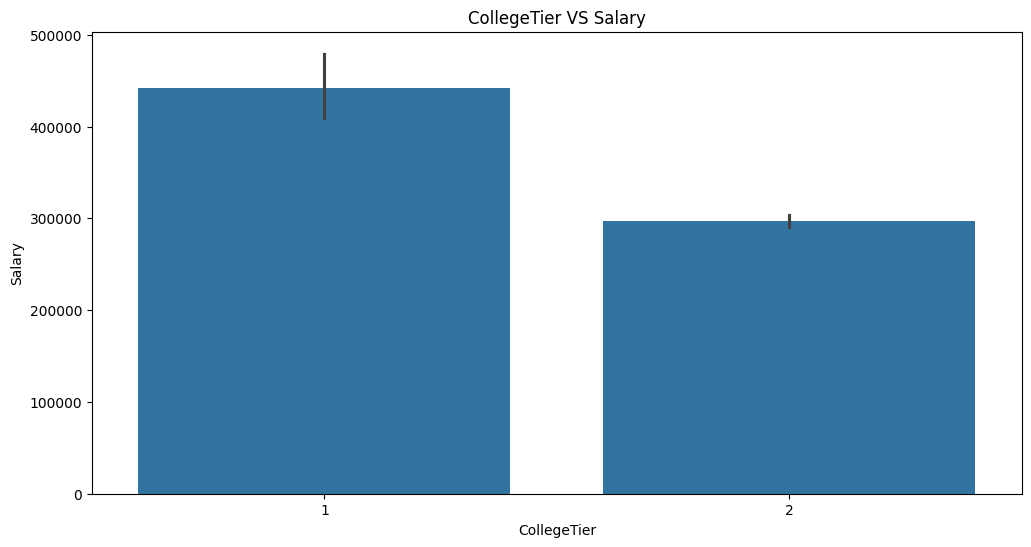

In [151]:
plt.figure(figsize=(12,6))
sns.barplot(y="Salary", x="CollegeTier", data=new_df)
plt.title("CollegeTier VS Salary")
plt.show()

#### Salary Vs. CollegeGPA

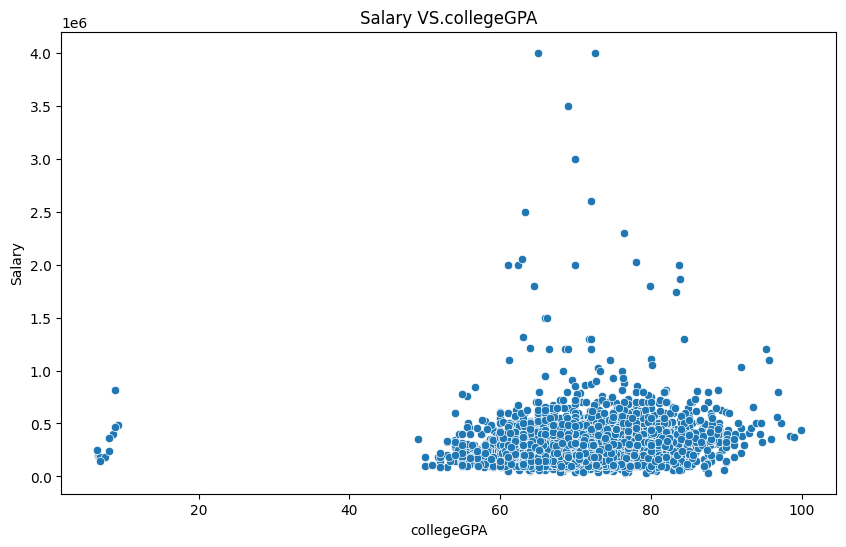

In [152]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="collegeGPA", y="Salary",data=new_df)
plt.title("Salary VS.collegeGPA")
plt.show()

Student with highest coLlegeGPA i,e more than 50.0 is get placed with salary/stipend.

#### Graduationyear Vs. Salary

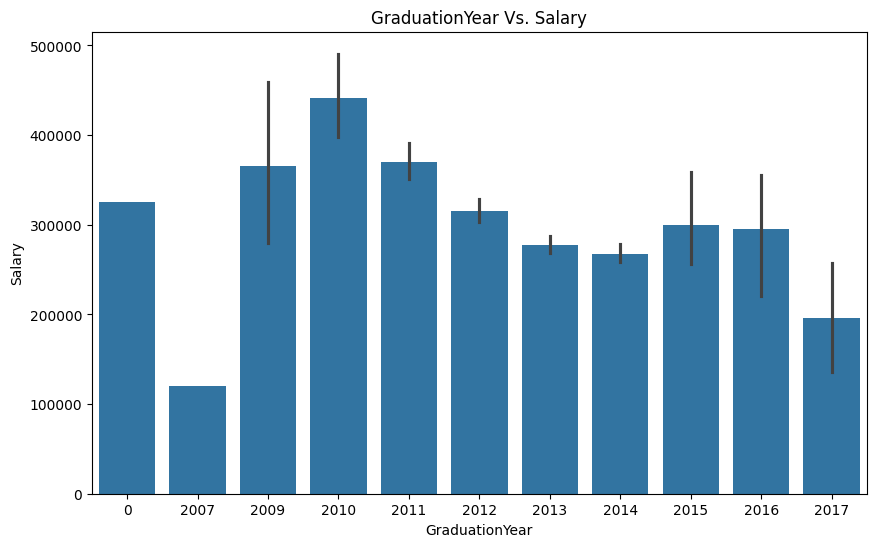

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(x="GraduationYear", y="Salary", data=new_df)
plt.title("GraduationYear Vs. Salary")
plt.show()

2010 passed out students get placed with highest salary

In [ ]:
                               ## Analysis of Categorical Vs. Numerical columns ##

#### Salary vs. Designation

<Figure size 900x600 with 0 Axes>

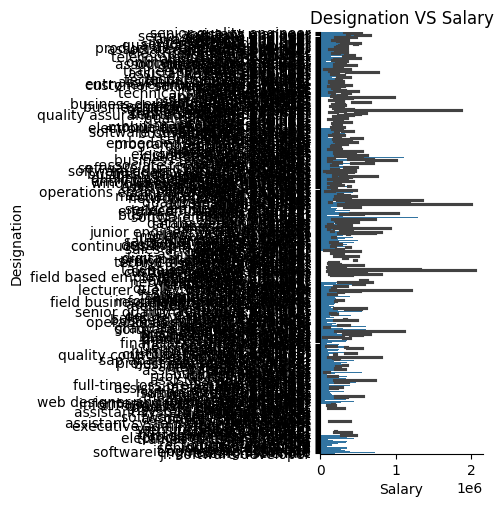

In [154]:
plt.figure(figsize=(9,6))
sns.catplot(y="Designation", x="Salary", kind="bar", data=new_df)
plt.title("Designation VS Salary")
plt.show()

#### JobCity Vs. Salary

<Figure size 900x600 with 0 Axes>

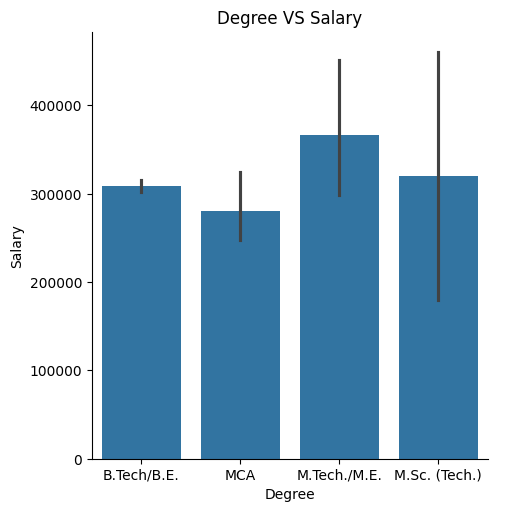

In [155]:
plt.figure(figsize=(9,6))
sns.catplot(x="Degree", y="Salary", kind="bar", data=new_df)
plt.title("Degree VS Salary")
plt.show()

#### Specialization Vs. Salary

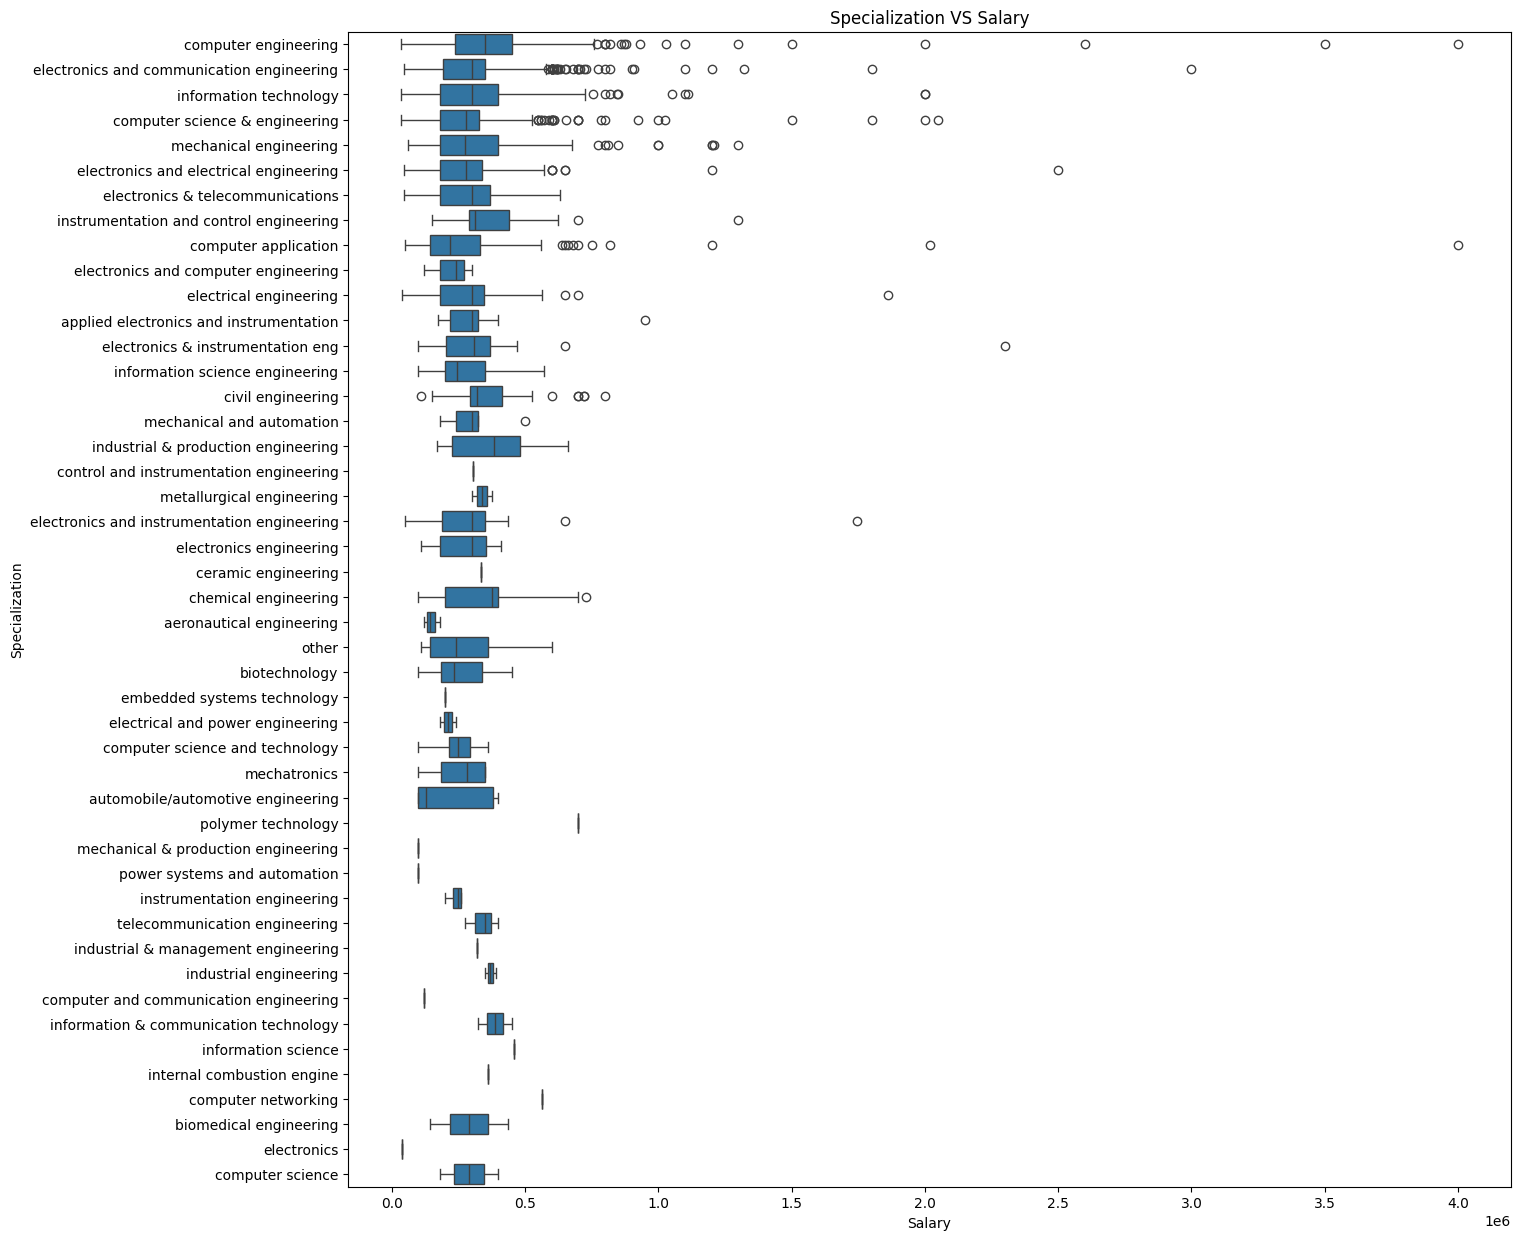

In [156]:
plt.figure(figsize=(15,15))
sns.boxplot(y="Specialization", x="Salary", data=new_df)
plt.title("Specialization VS Salary")
plt.show()

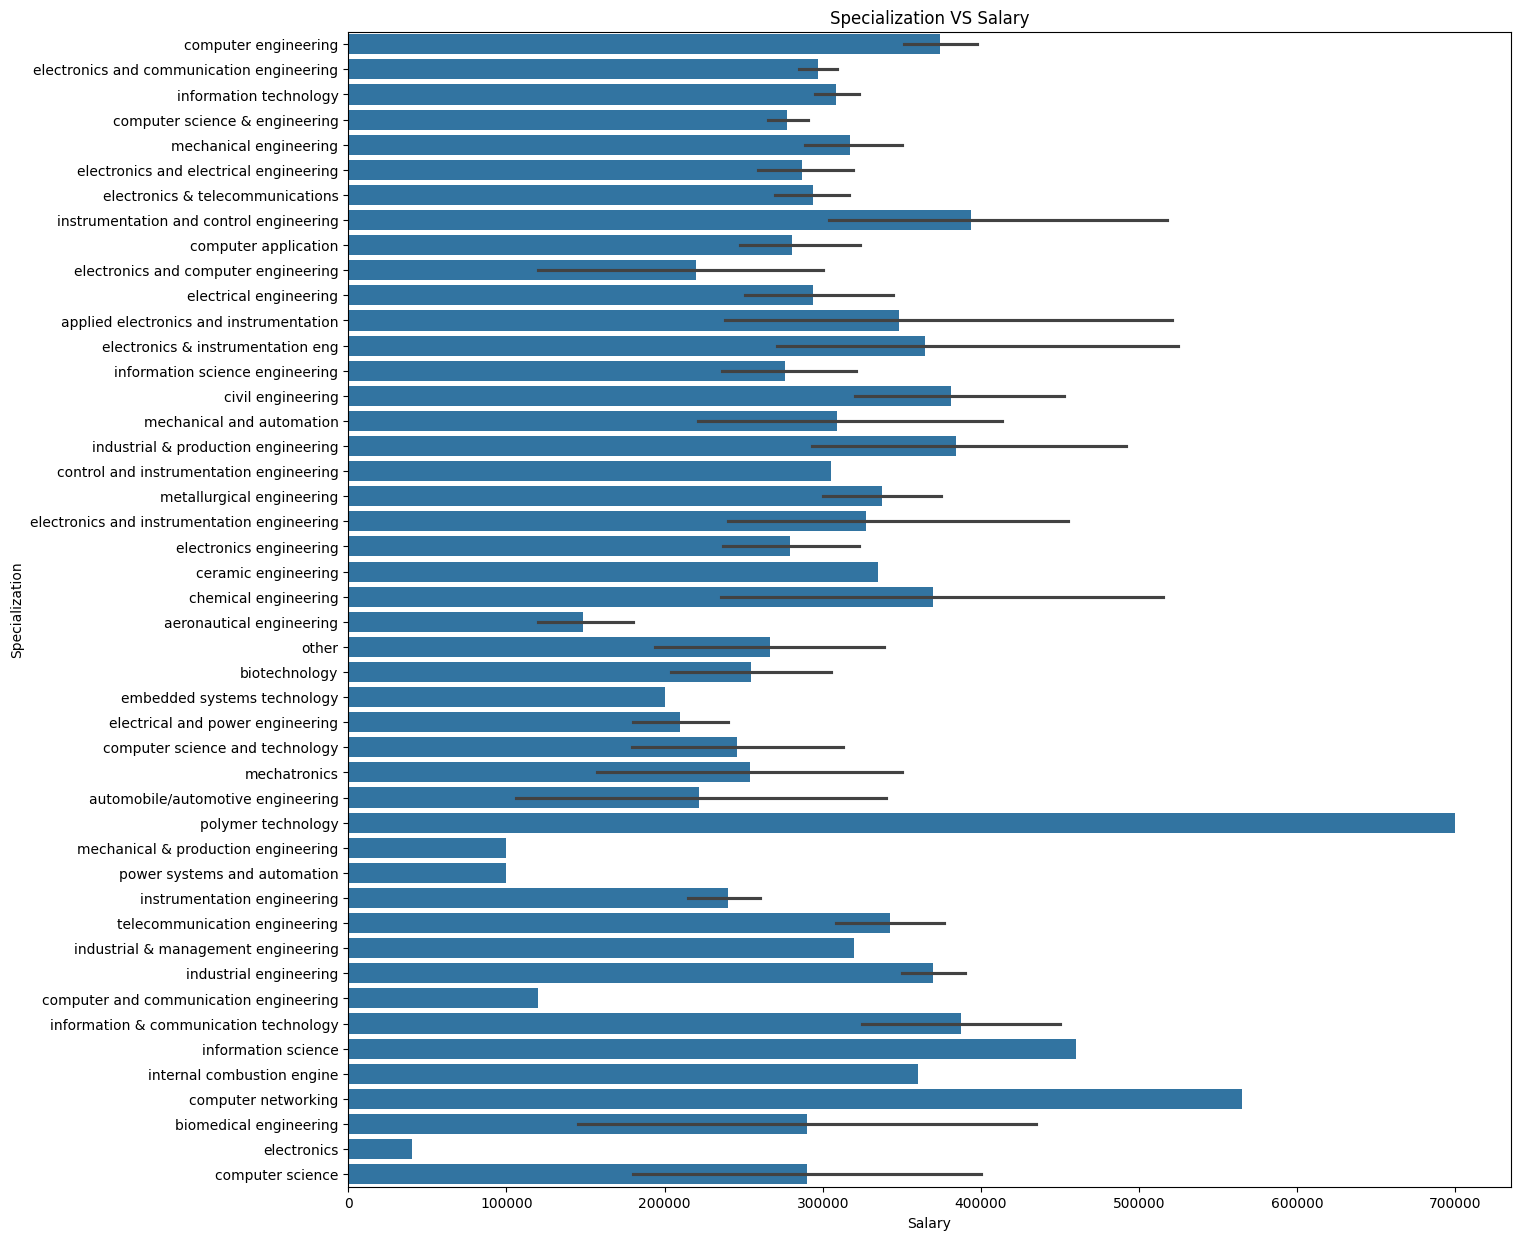

In [157]:
plt.figure(figsize=(15,15))
sns.barplot(y="Specialization", x="Salary", data=new_df)
plt.title("Specialization VS Salary")
plt.show()

Polymer Technology specialized candidates/Students earn maximum salary as compare to others.

#### Salary vs Gender

<Figure size 2500x2000 with 0 Axes>

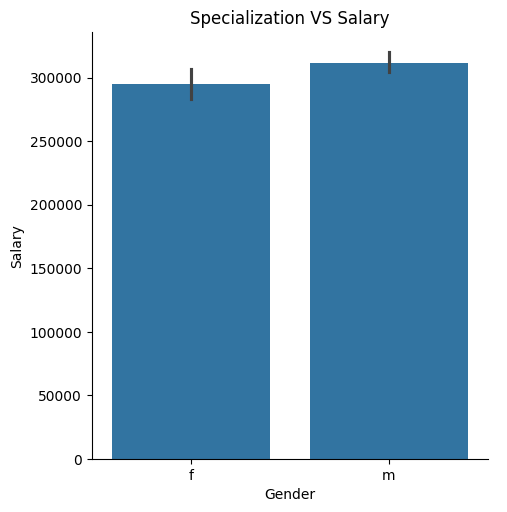

In [158]:
plt.figure(figsize=(25,20))
sns.catplot(x="Gender", y="Salary", kind="bar", data=new_df)
plt.title("Specialization VS Salary")
plt.show()

male employee earns more than female employee

#### Salary vs CollegeState

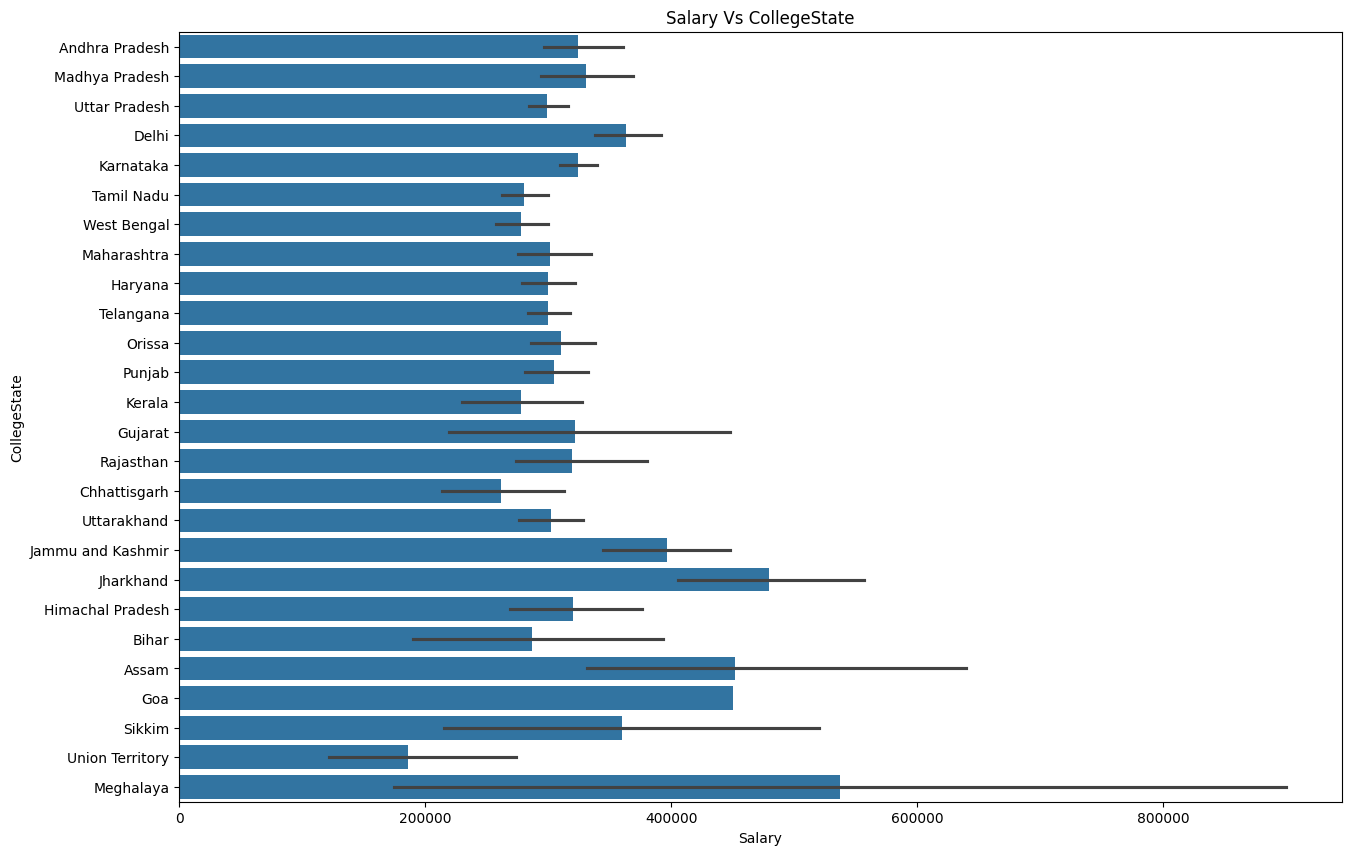

In [159]:
plt.figure(figsize=(15,10))
sns.barplot(y="CollegeState",x="Salary",data=new_df)
plt.title("Salary Vs CollegeState")
plt.show()

Meghalian Students earn more in compare to Other States Students.

### Step - 5: Research Questions

In [160]:
# Grouping the data by Designation and Specialization and calculate the average salary.

grouped_new_df = new_df.groupby(['Designation', 'Specialization']).agg({'Salary': 'mean'}).reset_index()

# Checking if the average salaries are within the range of 2.5-3 lakhs

lower_bound = 250000
upper_bound = 300000
result = (new_df['Salary'] >= lower_bound) & (new_df['Salary'] <= upper_bound)

if result.all():
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")

The claim is not supported by the data.


(2).Is there a relationship between gender and specialisation? (i.e. Does the preference of
    Specialisation depend on the Gender?)

<Figure size 2000x2000 with 0 Axes>

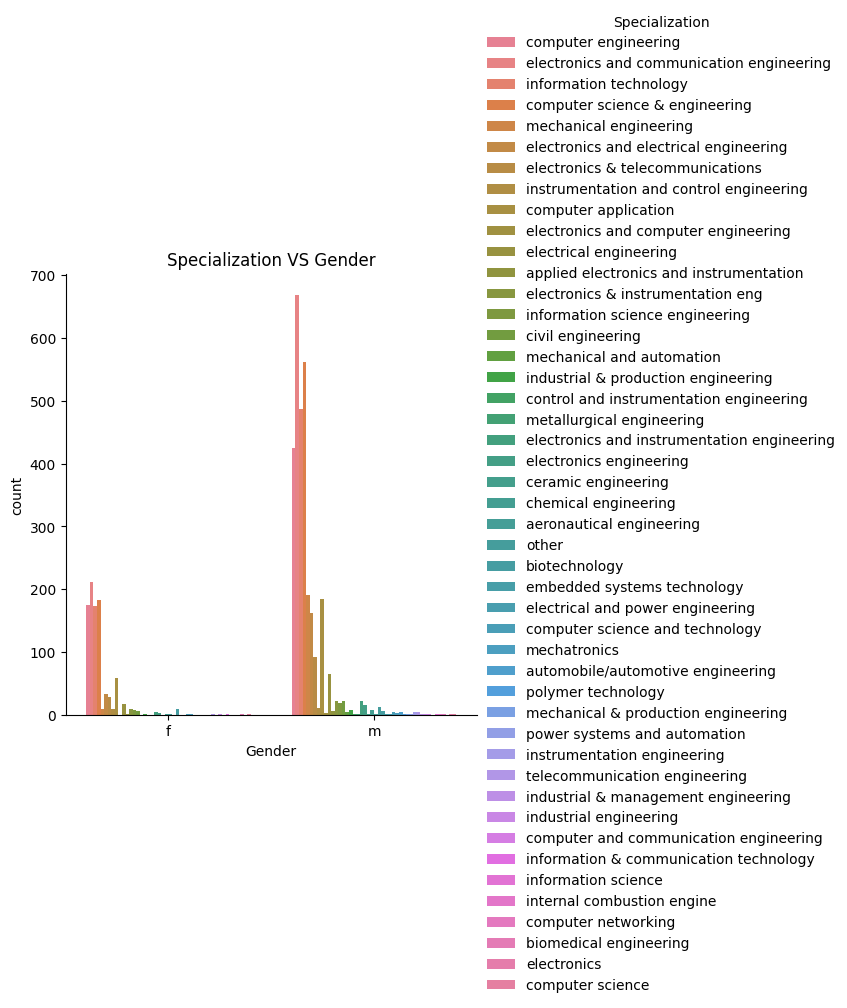

In [161]:
plt.figure(figsize=(20,20))
sns.catplot(x="Gender", hue="Specialization", kind="count", data=new_df)
plt.title("Specialization VS Gender")
plt.show()

### Step 6: Conclusion